In [1]:
import sqlite3, pandas

In [2]:
import matplotlib.pyplot as plt

In [3]:
db = sqlite3.connect("citi_bikes_2020.db")

In [4]:
pandas.read_sql_query("SELECT COUNT(*) from CitiBikes", db)

,COUNT(*)
0,1147251


In [5]:
pandas.read_sql_query("SELECT avg(Trip_Duration) from CitiBikes", db)

,avg(Trip_Duration)
0,792.039965


In [6]:
# Generator!

In [7]:
res = pandas.read_sql_query("SELECT * FROM CitiBikes", db, chunksize = 50_000)

In [8]:
res

<generator object SQLiteDatabase._query_iterator at 0x7fb410d2ed60>

In [9]:
# Lets make a Helper Function


In [10]:
def Q(sql):
    res = pandas.read_sql_query(sql, db, chunksize = 100_000)
    return next(res)

In [11]:
## LEts Try it out

In [12]:
res = Q("SELECT * FROM CitiBikes")
res

,Trip_Duration,StartTime,StopTime,StartStationID,StartStationName,StartStationLat,StartStationLong,EndStationID,EndStationName,EndStationLat,EndStationlog,BikeId,Usertype,Birthyear,Gender
0,1404,"""2020-02-01 00:00:05.9460""","""2020-02-01 00:23:30.7240""",316,"""Fulton St & William St""",40.709560,-74.006536,481,"""S 3 St & Bedford Ave""",40.712605,-73.962644,28874,"""Customer""",1995,1
1,1301,"""2020-02-01 00:00:06.2230""","""2020-02-01 00:21:48.0580""",237,"""E 11 St & 2 Ave""",40.730473,-73.986724,539,"""Metropolitan Ave & Bedford Ave""",40.715348,-73.960241,32588,"""Subscriber""",1991,1
2,474,"""2020-02-01 00:00:15.7210""","""2020-02-01 00:08:10.3440""",528,"""2 Ave & E 31 St""",40.742909,-73.977061,3785,"""W 42 St & 6 Ave""",40.754920,-73.984550,41013,"""Subscriber""",1994,1
3,487,"""2020-02-01 00:00:21.0520""","""2020-02-01 00:08:28.7520""",380,"""W 4 St & 7 Ave S""",40.734011,-74.002939,3263,"""Cooper Square & Astor Pl""",40.729515,-73.990753,27581,"""Subscriber""",1973,2
4,619,"""2020-02-01 00:00:27.4000""","""2020-02-01 00:10:47.0640""",472,"""E 32 St & Park Ave""",40.745712,-73.981948,237,"""E 11 St & 2 Ave""",40.730473,-73.986724,29062,"""Subscriber""",1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,863,"""2020-02-03 17:35:53.8780""","""2020-02-03 17:50:17.8720""",486,"""Broadway & W 29 St""",40.746201,-73.988557,317,"""E 6 St & Avenue B""",40.724537,-73.981854,41434,"""Subscriber""",1995,1
99996,238,"""2020-02-03 17:35:54.3010""","""2020-02-03 17:39:52.4590""",229,"""Great Jones St""",40.727434,-73.993790,3463,"""E 16 St & Irving Pl""",40.735367,-73.987974,40979,"""Subscriber""",1964,1
99997,1470,"""2020-02-03 17:35:54.9810""","""2020-02-03 18:00:25.8880""",3715,"""Driggs Ave & N 9 St""",40.718170,-73.955201,3571,"""Bedford Ave & Bergen St""",40.676368,-73.952918,38075,"""Subscriber""",1992,1
99998,940,"""2020-02-03 17:35:55.5230""","""2020-02-03 17:51:35.7870""",3286,"""E 89 St & 3 Ave""",40.780628,-73.952167,3506,"""Lexington Ave & E 120 St""",40.801307,-73.939817,41221,"""Customer""",1996,2


In [13]:
## Lets Clean our Table a Bit!

In [14]:
db.execute("""
CREATE TABLE
    Citi_Bike_Clean AS
SELECT
    (2018 - Birthyear) AS age,
    CASE WHEN gender = 0 THEN "X"
         WHEN gender = 1 THEN "M"
         WHEN gender = 2 THEN "F"
    END as sex,

*
FROM CitiBikes
WHERE age > 0
  AND age <80
  AND Trip_Duration < 6000
  
    
""")

OperationalError: table Citi_Bike_Clean already exists

In [77]:
db.execute("""
CREATE TABLE
    Citi_Bike_Clean AS
SELECT
    (2018 - Birthyear) AS age,
    CASE WHEN gender = 0 THEN "X"
         WHEN gender = 1 THEN "M"
         WHEN gender = 2 THEN "F"
    END as sex,

*
FROM CitiBikes
WHERE age > 0
  AND age <80
  AND Trip_Duration < 6000
  
    
""")

In [53]:
db.execute("""
CREATE TABLE
    Citi_Bike_Clean_3 AS
SELECT
    (2018 - Birthyear) AS age,
    CASE WHEN gender = 0 THEN "X"
         WHEN gender = 1 THEN "M"
         WHEN gender = 2 THEN "F"
    END as sex,

*
FROM CitiBikes
WHERE age = 40
  
    
""")

## How to Drop a Table in SQLite

In [69]:
conn = sqlite3.connect('citi_bikes_2020.db')
cursor = conn.cursor()


In [70]:
cursor.execute("DROP TABLE Citi_Bike_Clean2")
print("Table was dropped ")

Table was dropped 


In [71]:

# commit the change~
conn.commit()

In [15]:
new = Q("SELECT * FROM Citi_Bike_Clean")

In [16]:
new

,age,sex,Trip_Duration,StartTime,StopTime,StartStationID,StartStationName,StartStationLat,StartStationLong,EndStationID,EndStationName,EndStationLat,EndStationlog,BikeId,Usertype,Birthyear,Gender
0,23,M,1404,"""2020-02-01 00:00:05.9460""","""2020-02-01 00:23:30.7240""",316,"""Fulton St & William St""",40.709560,-74.006536,481,"""S 3 St & Bedford Ave""",40.712605,-73.962644,28874,"""Customer""",1995,1
1,27,M,1301,"""2020-02-01 00:00:06.2230""","""2020-02-01 00:21:48.0580""",237,"""E 11 St & 2 Ave""",40.730473,-73.986724,539,"""Metropolitan Ave & Bedford Ave""",40.715348,-73.960241,32588,"""Subscriber""",1991,1
2,24,M,474,"""2020-02-01 00:00:15.7210""","""2020-02-01 00:08:10.3440""",528,"""2 Ave & E 31 St""",40.742909,-73.977061,3785,"""W 42 St & 6 Ave""",40.754920,-73.984550,41013,"""Subscriber""",1994,1
3,45,F,487,"""2020-02-01 00:00:21.0520""","""2020-02-01 00:08:28.7520""",380,"""W 4 St & 7 Ave S""",40.734011,-74.002939,3263,"""Cooper Square & Astor Pl""",40.729515,-73.990753,27581,"""Subscriber""",1973,2
4,24,M,619,"""2020-02-01 00:00:27.4000""","""2020-02-01 00:10:47.0640""",472,"""E 32 St & Park Ave""",40.745712,-73.981948,237,"""E 11 St & 2 Ave""",40.730473,-73.986724,29062,"""Subscriber""",1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,48,M,215,"""2020-02-03 17:40:13.0600""","""2020-02-03 17:43:48.1790""",3783,"""Cliff St & Fulton St""",40.708380,-74.004950,319,"""Fulton St & Broadway""",40.711066,-74.009447,34144,"""Subscriber""",1970,1
99996,43,M,459,"""2020-02-03 17:40:13.1930""","""2020-02-03 17:47:52.2710""",513,"""W 56 St & 10 Ave""",40.768254,-73.988639,3809,"""W 55 St & 6 Ave""",40.763189,-73.978434,30136,"""Subscriber""",1975,1
99997,19,F,244,"""2020-02-03 17:40:13.4040""","""2020-02-03 17:44:18.2250""",426,"""West St & Chambers St""",40.717548,-74.013221,328,"""Watts St & Greenwich St""",40.724055,-74.009660,21171,"""Subscriber""",1999,2
99998,25,F,238,"""2020-02-03 17:40:13.6950""","""2020-02-03 17:44:11.9610""",3126,"""44 Dr & Jackson Ave""",40.747182,-73.943264,3123,"""31 St & Thomson Ave""",40.744697,-73.935404,35312,"""Subscriber""",1993,2


In [17]:
res = Q("SELECT COUNT(*) from Citi_Bike_Clean")

In [18]:
res

,COUNT(*)
0,1142491


In [19]:
res = Q("SELECT * from Citi_Bike_Clean")

In [20]:
res

,age,sex,Trip_Duration,StartTime,StopTime,StartStationID,StartStationName,StartStationLat,StartStationLong,EndStationID,EndStationName,EndStationLat,EndStationlog,BikeId,Usertype,Birthyear,Gender
0,23,M,1404,"""2020-02-01 00:00:05.9460""","""2020-02-01 00:23:30.7240""",316,"""Fulton St & William St""",40.709560,-74.006536,481,"""S 3 St & Bedford Ave""",40.712605,-73.962644,28874,"""Customer""",1995,1
1,27,M,1301,"""2020-02-01 00:00:06.2230""","""2020-02-01 00:21:48.0580""",237,"""E 11 St & 2 Ave""",40.730473,-73.986724,539,"""Metropolitan Ave & Bedford Ave""",40.715348,-73.960241,32588,"""Subscriber""",1991,1
2,24,M,474,"""2020-02-01 00:00:15.7210""","""2020-02-01 00:08:10.3440""",528,"""2 Ave & E 31 St""",40.742909,-73.977061,3785,"""W 42 St & 6 Ave""",40.754920,-73.984550,41013,"""Subscriber""",1994,1
3,45,F,487,"""2020-02-01 00:00:21.0520""","""2020-02-01 00:08:28.7520""",380,"""W 4 St & 7 Ave S""",40.734011,-74.002939,3263,"""Cooper Square & Astor Pl""",40.729515,-73.990753,27581,"""Subscriber""",1973,2
4,24,M,619,"""2020-02-01 00:00:27.4000""","""2020-02-01 00:10:47.0640""",472,"""E 32 St & Park Ave""",40.745712,-73.981948,237,"""E 11 St & 2 Ave""",40.730473,-73.986724,29062,"""Subscriber""",1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,48,M,215,"""2020-02-03 17:40:13.0600""","""2020-02-03 17:43:48.1790""",3783,"""Cliff St & Fulton St""",40.708380,-74.004950,319,"""Fulton St & Broadway""",40.711066,-74.009447,34144,"""Subscriber""",1970,1
99996,43,M,459,"""2020-02-03 17:40:13.1930""","""2020-02-03 17:47:52.2710""",513,"""W 56 St & 10 Ave""",40.768254,-73.988639,3809,"""W 55 St & 6 Ave""",40.763189,-73.978434,30136,"""Subscriber""",1975,1
99997,19,F,244,"""2020-02-03 17:40:13.4040""","""2020-02-03 17:44:18.2250""",426,"""West St & Chambers St""",40.717548,-74.013221,328,"""Watts St & Greenwich St""",40.724055,-74.009660,21171,"""Subscriber""",1999,2
99998,25,F,238,"""2020-02-03 17:40:13.6950""","""2020-02-03 17:44:11.9610""",3126,"""44 Dr & Jackson Ave""",40.747182,-73.943264,3123,"""31 St & Thomson Ave""",40.744697,-73.935404,35312,"""Subscriber""",1993,2


In [21]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
import seaborn

In [21]:
res = Q(
"""
SELECT age, COUNT(*) AS c
FROM Citi_Bike_Clean
GROUP BY age
""")

In [22]:
res

,age,c
0,14,9
1,15,1102
2,16,1908
3,17,3428
4,18,7969
...,...,...
61,75,669
62,76,588
63,77,416
64,78,553


In [23]:
res.c

0        9
1     1102
2     1908
3     3428
4     7969
      ... 
61     669
62     588
63     416
64     553
65     105
Name: c, Length: 66, dtype: int64

(array([9.0000e+00, 1.1020e+03, 1.9080e+03, 3.4280e+03, 7.9690e+03,
        1.1081e+04, 1.1124e+04, 1.5293e+04, 2.3756e+04, 3.3952e+04,
        3.7243e+04, 3.9164e+04, 4.3190e+04, 4.4856e+04, 4.5525e+04,
        4.5658e+04, 4.2212e+04, 3.7426e+04, 3.5366e+04, 3.5985e+04,
        3.2470e+04, 3.2266e+04, 2.8700e+04, 2.6938e+04, 2.6511e+04,
        2.3881e+04, 2.1399e+04, 2.0058e+04, 2.0024e+04, 2.1203e+04,
        1.8918e+04, 1.8235e+04, 1.8477e+04, 1.9608e+04, 2.1527e+04,
        6.4211e+04, 1.7805e+04, 1.7207e+04, 1.6468e+04, 1.7799e+04,
        1.5611e+04, 1.4832e+04, 1.5068e+04, 1.2714e+04, 1.2908e+04,
        1.1178e+04, 9.2370e+03, 9.1710e+03, 7.2410e+03, 6.5590e+03,
        5.4110e+03, 4.8290e+03, 2.9620e+03, 3.0980e+03, 2.4360e+03,
        1.5920e+03, 1.6630e+03, 1.5200e+03, 1.1110e+03, 6.3200e+02,
        4.3500e+02, 6.6900e+02, 5.8800e+02, 4.1600e+02, 5.5300e+02,
        1.0500e+02]),
 array([14.        , 14.98484848, 15.96969697, 16.95454545, 17.93939394,
        18.92424242, 

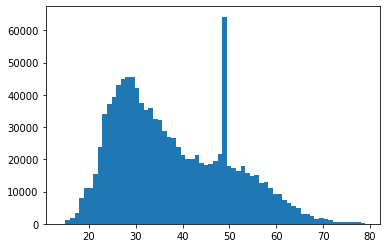

In [128]:
hist(res.age, weights=res.c, bins=len(res))

In [129]:
res = Q("""
SELECT
    age,
    sum( CASE WHEN sex="F" then 1 end) as "F",
    sum( CASE WHEN sex="M" then 1 end) as "M"
from 
 Citi_Bike_Clean
GROUP BY 1
""")

In [130]:
res.head()

,age,F,M
0,14,3,6
1,15,151,951
2,16,284,1618
3,17,570,2817
4,18,1406,6404


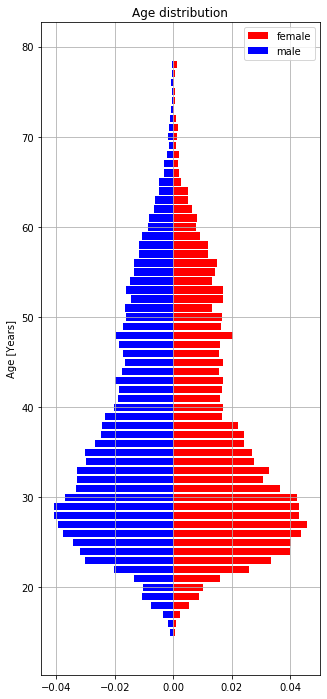

In [132]:
figure(figsize=(5,12))
barh(res.age, res.F/res.F.sum(), color='r', label='female')
barh(res.age, -res.M/res.M.sum(), color ='b', label = 'male')
title('Age distribution')
ylabel("Age [Years]")
grid()
legend()

In [135]:
res = Q("""
SELECT
    age,
    sum( CASE WHEN usertype = "Subscriber" then 1 end) as s,
    sum( CASE WHEN usertype != "Subscriber" then 1 end) as d
from 
    Citi_Bike_Clean
    
GROUP BY 1
""")
res.head()

,age,s,d
0,14,None,9
1,15,None,1102
2,16,None,1908
3,17,None,3428
4,18,None,7969


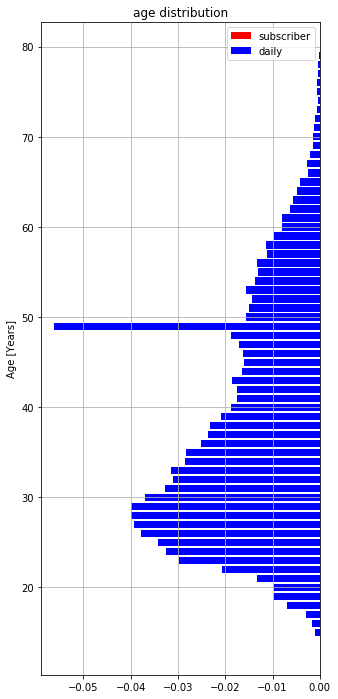

In [136]:
figure(figsize=(5,12))
barh(res.age, res.s/res.s.sum(), color='r', label='subscriber')
barh(res.age, -res.d/res.d.sum(), color ='b', label = 'daily')
title('age distribution')
ylabel("Age [Years]")
grid()
legend()

In [143]:
res = Q("""
SELECT
    Trip_Duration / 60 AS "Duration",
    sum (case when sex = "F" then 1 end) AS "F",
    sum (case when sex = "M" then 1 end) AS "M"
FROM
    Citi_Bike_Clean
GROUP BY 1

LIMIT 25

    
""")

In [144]:
res

,Duration,F,M
0,1,3720,20979
1,2,10005,48018
2,3,15488,64807
3,4,18645,71395
4,5,19424,71060
5,6,19087,66893
6,7,18071,59863
7,8,16155,52887
8,9,14453,45587
9,10,12956,39497


(0, 30)

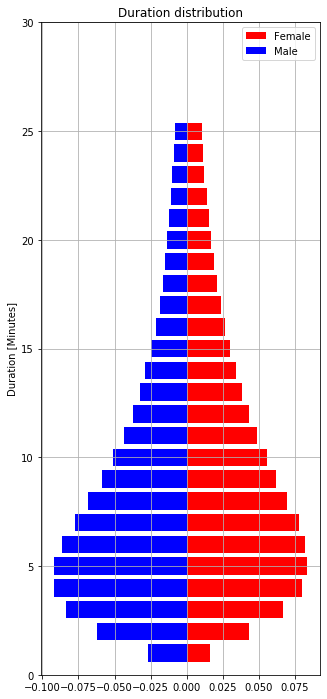

In [149]:
figure(figsize=(5,12))
barh(res.Duration, res.F/res.F.sum(), color='r', label='Female')
barh(res.Duration, -res.M/res.M.sum(), color ='b', label = 'Male')
title('Duration distribution')
ylabel("Duration [Minutes]")
grid()
legend()
ylim(0,30)

In [ ]:
# how does the distribution of duration varies for user types and ages?


In [ ]:
## look at stations

In [174]:
res = Q("""
SELECT
    StartStationName,
    StartStationLat AS Lat,
    StartStationLong AS Long,
    COUNT (*) as C
FROM
    Citi_Bike_Clean

GROUP by 1,2,3

""")

In [175]:
res.head()

,StartStationName,Lat,Long,C
0,"""1 Ave & E 110 St""",40.792327,-73.938300,619
1,"""1 Ave & E 16 St""",40.732219,-73.981656,4382
2,"""1 Ave & E 18 St""",40.733812,-73.980544,4097
3,"""1 Ave & E 30 St""",40.740000,-73.974000,1
4,"""1 Ave & E 30 St""",40.741444,-73.975361,2577


In [ ]:
## nice histogram

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  7., 12., 10., 17., 26.,
        27., 18., 30., 24., 27., 31., 27., 29., 24., 27., 25., 25., 28.,
        26., 24., 23., 17., 20., 19., 17., 14., 26., 17., 19., 26., 20.,
        20., 28., 24., 20., 18., 20., 18., 17., 10., 11.,  9., 10., 13.,
        11., 11., 12.,  9.,  7.,  7.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([40.6  , 40.603, 40.606, 40.609, 40.612, 40.615, 40.618, 40.621,
        40.624, 40.627, 40.63 , 40.633, 40.636, 40.639, 40.642, 40.645,
        40.648, 40.651, 40.654, 40.657, 40.66 , 40.663, 40.666, 40.669,
        40.672, 40.675, 40.678, 40.681, 40.684, 40.687, 40.69 , 40.693,
        40.696, 40.699, 40.702, 40.705, 40.708, 40.711, 40.714, 40.717,
        40.72 , 40.723, 40.726, 40.729, 40.732, 40.735, 40.738, 40.741,
  

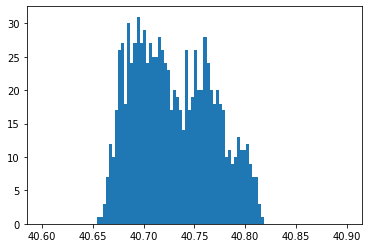

In [154]:
hist(res.Lat, range=(40.6, 40.9), bins = 100)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  3.,  7., 14., 24., 20., 25., 26., 26., 38., 43., 47., 39.,
        41., 45., 35., 33., 20., 22., 32., 31., 36., 42., 33., 36., 31.,
        26., 25., 24., 18., 10., 16., 15.,  9., 14., 16., 12., 10., 12.,
         8.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-74.1  , -74.097, -74.094, -74.091, -74.088, -74.085, -74.082,
        -74.079, -74.076, -74.073, -74.07 , -74.067, -74.064, -74.061,
        -74.058, -74.055, -74.052, -74.049, -74.046, -74.043, -74.04 ,
        -74.037, -74.034, -74.031, -74.028, -74.025, -74.022, -74.019,
        -74.016, -74.013, -74.01 , -74.007, -74.004, -74.001, -73.998,
        -73.995, -73.992, -73.989, -73.986, -73.983, -73.98 , -73.977,
        

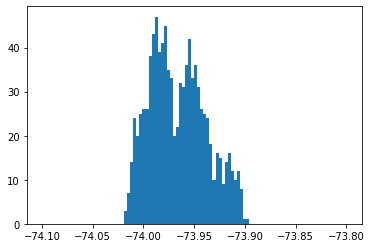

In [156]:
hist(res.Long, range = (-74.1, -73.8), bins = 100)

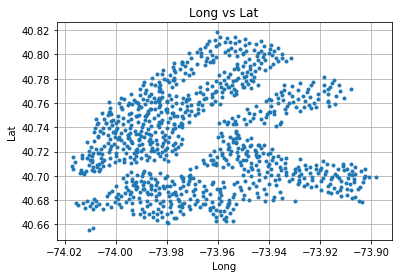

In [161]:
plot(res.Long, res.Lat, '.')
title('Long vs Lat')
ylabel("Lat")
xlabel("Long")
grid()


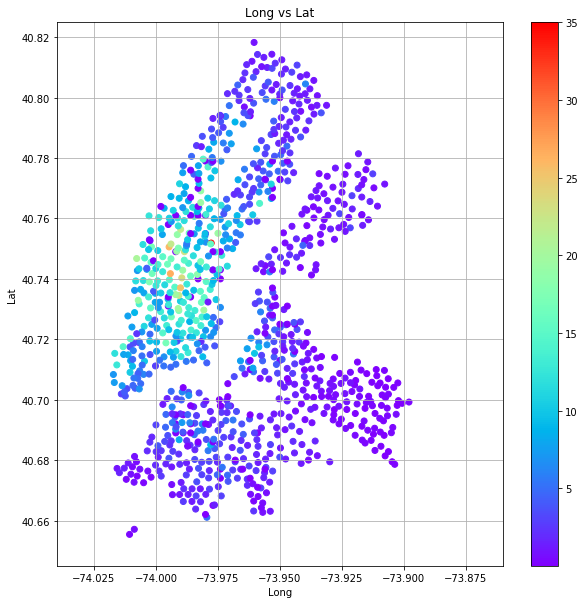

In [168]:
figure(figsize = (10,10))
xstart = -74.04
ystart = 40.645
extent = .18
scatter(res.Long, res.Lat, c = 35*res.C/res.C.max(), cmap ='rainbow')
xlim(xstart, xstart+extent)

ylim(ystart, ystart+extent)

#plot(res.Long, res.Lat, '.')
#colorbar()
title('Long vs Lat')
ylabel("Lat")
xlabel("Long")
grid()
colorbar()


In [ ]:
### HERE IS IT, we can see where people use the Bikes at ( looks like New York)

In [ ]:
# let make it a function

In [191]:
def my_plot(x, y, s, c, max_size = 50):

    figure(figsize = (10,10))
    xstart = -74.04
    ystart = 40.645
    extent = .18
    scatter(x, y, s = max_size*s/max(s), c=c, cmap ='rainbow')
    xlim(xstart, xstart+extent)

    ylim(ystart, ystart+extent)
    title('Long vs Lat')
    ylabel("Lat")
    xlabel("Long")
    grid()
    colorbar()


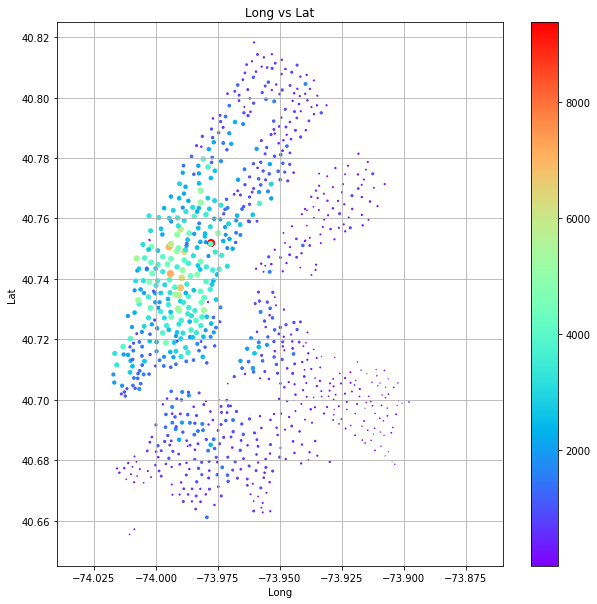

In [192]:
my_plot(res.Long, res.Lat, res.C, res.C)

In [195]:
res = Q(
"""
SELECT

    StartStationName,
    StartStationLong as Long,
    StartStationLat as Lat,
    
    AVG(Trip_Duration) as D,
    
    sum (case when sex ="F" then 1 end) as "F",
    sum (case when sex ="M" then 1 end) as "M"
FROM
    Citi_Bike_Clean

GROUP BY 1,2,3

"""
)

In [196]:
res.head()

,StartStationName,Long,Lat,D,F,M
0,"""1 Ave & E 110 St""",-73.938300,40.792327,665.381260,131.0,474.0
1,"""1 Ave & E 16 St""",-73.981656,40.732219,592.057052,997.0,3198.0
2,"""1 Ave & E 18 St""",-73.980544,40.733812,587.435685,1072.0,2898.0
3,"""1 Ave & E 30 St""",-73.975361,40.741444,696.627862,540.0,1944.0
4,"""1 Ave & E 30 St""",-73.974000,40.740000,237.000000,1.0,NaN


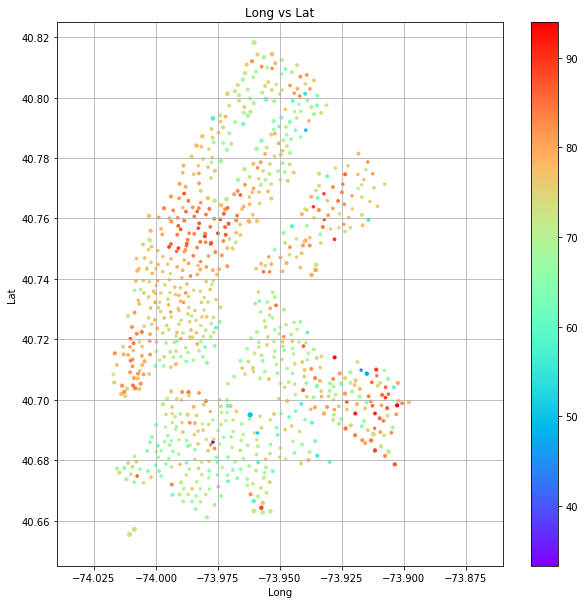

In [199]:
my_plot (res.Long, res.Lat, res.D, 100*res.M/(res.M+res.F))

In [ ]:
### bigger the size, the female to male ratio (male = redishm  blue = more female) 

In [211]:
res = Q(
"""
SELECT

    StartStationName,
    StartStationLong as Long,
    StartStationLat as Lat,
        
    AVG (case when sex ="F" then age end) as "F",
    AVG (case when sex ="M" then age end) as "M",
    COUNT (*) as C
FROM
    Citi_Bike_Clean

GROUP BY 1,2,3

"""
)

In [ ]:
## Red is older, while blue is young (Ages)

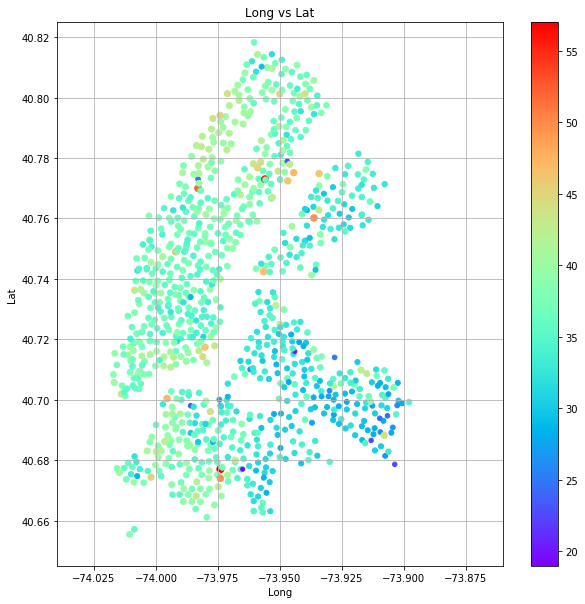

In [216]:
my_plot(res.Long, res.Lat, res.F*1,res.F )